<a href="https://colab.research.google.com/github/Valerie-Perea/data_science_projects_vp/blob/main/vp_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title

## Problem Definition


State the business problem. Translate the business problem into a Data Science problem by stating what kind of problem it is ( supervised vs unsupervised ) and whether it is a classification, regression, or clustering problem.

 Business Problem

*   We want to know whether or not a future customer will make a transaction based on their previous transactions.
*  This is a supervised problem because we have labeled data (wheter or not the customer made the transaction in 0 or 1)
*  This is a classification problem because we are classifying into two categories (1 is a succesful transaction, 0 is unsuccesful)


## Data Collection/Sources


Load Pandas, Numpy, and Matplotlib..

In [ ]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

Load data Train.csv from the Google Drive folder.

In [ ]:
# First I will assign my file path a name
url = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv'
# I am assigning a variable to the read_csv function to read a CSV file in a pandas dataframe
df = pd.read_csv(url)
# using the .head function I am looking at the first 5 rows of the dataframe
df.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


## Data Cleaning


In [ ]:
# using .info to look at a general summary in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 53 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  180000 non-null  int64  
 1   ID_code     180000 non-null  object 
 2   target      180000 non-null  int64  
 3   var_0       180000 non-null  float64
 4   var_1       180000 non-null  float64
 5   var_2       180000 non-null  float64
 6   var_3       180000 non-null  float64
 7   var_4       180000 non-null  float64
 8   var_5       180000 non-null  float64
 9   var_6       180000 non-null  float64
 10  var_7       180000 non-null  float64
 11  var_8       180000 non-null  float64
 12  var_9       180000 non-null  float64
 13  var_10      180000 non-null  float64
 14  var_11      180000 non-null  float64
 15  var_12      180000 non-null  float64
 16  var_13      180000 non-null  float64
 17  var_14      180000 non-null  float64
 18  var_15      180000 non-null  float64
 19  va

In [ ]:
# using .describe to look at common statistcal info of the data
df.describe()

,Unnamed: 0,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
count,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.00000,180000.000000,...,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000
mean,89999.500000,0.100222,10.678650,-1.630045,10.712922,5.408688,7.566953,14.024017,8.52808,15.243424,...,5.635897,-0.000418,-0.668334,20.208845,2.595090,12.756574,3.236201,7.440715,1.927078,15.870166
std,51961.668564,0.300297,3.041036,4.050519,2.639146,0.866265,1.235043,0.190038,4.64170,7.851050,...,0.369629,4.422915,5.968300,7.132446,2.801692,9.320939,4.561317,3.021636,1.476777,3.010492
min,0.000000,0.000000,0.408400,-15.043400,2.117100,2.347300,3.970500,13.434600,-6.01110,-10.664200,...,4.258800,-14.506000,-22.748700,-2.995300,-7.856100,-18.489700,-14.093300,-2.691700,-3.814500,6.299300
25%,44999.750000,0.000000,8.451675,-4.745600,8.720000,4.768500,6.618800,13.893900,5.06575,9.170200,...,5.374200,-3.253575,-4.997500,15.062900,0.628600,5.661300,-0.062000,5.160325,0.890000,13.830400
50%,89999.500000,0.000000,10.526750,-1.611250,10.579600,5.385600,7.628500,14.025500,8.59920,15.198900,...,5.634500,0.008500,-0.560300,20.203300,2.513800,12.520300,3.204650,7.350950,1.899700,15.934600
75%,134999.250000,0.000000,12.756200,1.360225,12.514100,6.003200,8.583800,14.164400,12.27330,21.010500,...,5.905600,3.098325,3.632525,25.639125,4.396725,19.461725,6.409900,9.511125,2.947225,18.061425
max,179999.000000,1.000000,20.315000,10.376800,19.353000,8.447700,11.150600,14.654500,22.33150,41.748000,...,7.089000,16.731900,18.855400,43.546800,13.448700,44.363400,18.440900,16.716500,8.402400,26.079100


In [ ]:
# .shape gives info of (rows, columns)
df.shape

(180000, 53)

In [ ]:
df.tail()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
179995,179995,train_179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,179996,train_179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,179997,train_179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,179998,train_179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760
179999,179999,train_179999,0,11.6252,3.3959,11.5558,4.2003,7.4666,13.7381,12.9590,...,5.0415,-2.4210,-3.6829,14.2422,1.0741,26.3943,4.1482,11.9539,2.9846,15.6002


In [ ]:
# using .copy allows me to make a new object with the data in the original dataframe without changing original dataframe
df_new = df.copy()
df_new

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,179995,train_179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,179996,train_179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,179997,train_179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,179998,train_179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760


In [ ]:
# Checking to see if the copy looks correct
df_new.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


In [ ]:
# Dropping unnamed column because it just is number of rows from 0-180000
df_new.drop(['Unnamed: 0'], axis=1, inplace=True)
df_new.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


In [ ]:
# Also dropping ID_code because it gives same info as counting down the rows
df_new.drop(['ID_code'], axis=1, inplace=True)
df_new.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


In [ ]:
# Column 'target' has values of either 0 or 1 based on the .info
# to make sure we still need this row I will look at the data
df_new['target'].unique()

array([0, 1])

In [ ]:
#I will keep this row because it does have a value of 0 or 1 assigned to each row

In [ ]:
# Check presence of nulls
df_new.isnull().sum()

,0
target,0
var_0,0
var_1,0
var_2,0
var_3,0
var_4,0
var_5,0
var_6,0
var_7,0
var_8,0


In [ ]:
# We have no nulls so we can move on from the data cleaning!

## Exploratory Data Analysis


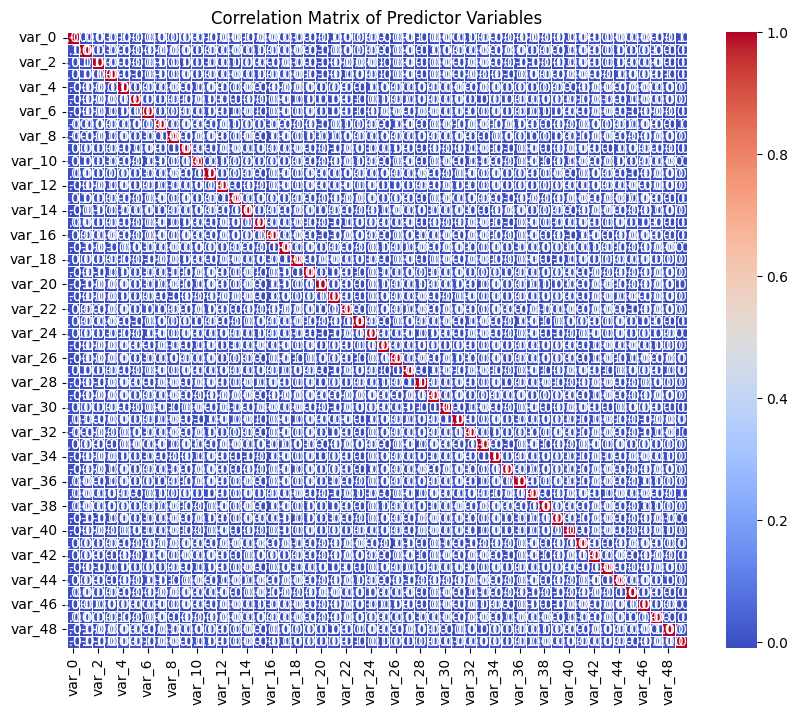

In [ ]:
predictors = df_new.drop(columns=['target'])  # Remove the target column

# Calculate the correlation matrix
correlation_matrix = predictors.corr()

# Plot the heatmap for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Predictor Variables')
plt.show()

This shows us that all of the values have a correlation value of nearly 0, which means that there is no correlation between the variables. This is great for a Naive Bayes because it assumes independence of variables.

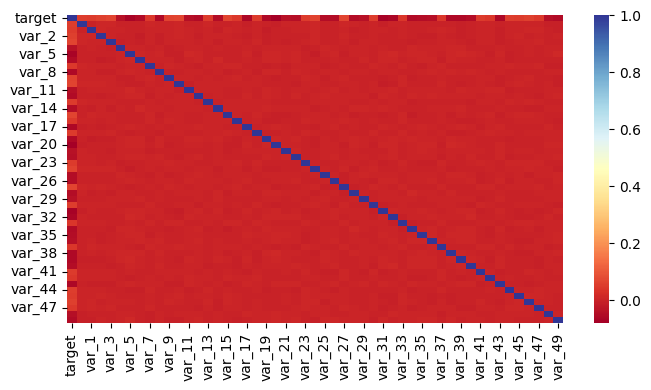

In [ ]:
#Here i'm not taking out the target column. This is an issue because i'm not just looking at predictor values.
corr = df_new.corr()
plt.figure(figsize=(8,4))
sns.heatmap(corr, cmap='RdYlBu',annot = False);

In [ ]:
for col in df_new.columns:
    print(col)
    print(df_new[col].unique())

target
[0 1]
var_0
[ 8.9255 11.5006  8.6093 ...  6.0419  6.145  15.7964]
var_1
[-6.7863 -4.1473 -2.7457 ... -3.0079 -4.4768  7.1923]
var_2
[11.9081 13.8588 12.0805 ... 17.2377 16.73    6.5901]
var_3
[5.1187 5.6208 6.9427 ... 4.36   3.3854 7.69  ]
var_4
[ 5.747   8.0851  5.9525 ...  5.7632 10.2475  5.4907]
var_5
[14.0137 14.0239 14.1929 ... 14.4435 14.5587 14.4881]
var_6
[ 0.5745  8.4135  7.3124 ... 12.5927 12.2584 11.4228]
var_7
[ 4.284   7.8     4.7011 ... 29.0286 16.1962 16.0279]
var_8
[16.2191  2.7407 18.1377 ... 15.7685 29.9869  8.5698]
var_9
[ 2.5791  8.5524  1.2145 ...  8.9305  3.34   10.1279]
var_10
[ -5.1488 -11.7684  -7.994  ...  -0.6568  -0.3601   6.7832]
var_11
[16.8911 19.371  19.0422 ...  6.1809 21.7327  7.9943]
var_12
[11.192  11.3702 11.0449 ... 10.0939 12.7994 10.193 ]
var_13
[ -5.2387 -11.1147 -13.5174 ...   4.0349  -8.8261  -9.0974]
var_14
[11.6418  1.2444  4.1006 ...  0.7054  0.6247 17.49  ]
var_15
[5.1736 6.6885 6.4059 ... 4.4221 4.5883 4.3329]
var_16
[22.4321  7.93

In [ ]:
for plot in df_new.columns: # Looking at distribution of all variables
    fig = px.histogram(df_new, x=plot, color='target')
    fig.show()


In [ ]:
for plot in df_new.columns:
    fig = px.box(df_new, x='target', y=plot)
    fig.show()

* Creating two data frames, one with succesful transactions, one with unsuccesful transactions.

In [ ]:
# Successful transactions (target == 1)
successful_transactions = df[df['target'] == 1].copy()

# Unsuccessful transactions (target == 0)
unsuccessful_transactions = df[df['target'] == 0].copy()

In [ ]:
# Making sure the copy worked by checking original dataframe
print(df.head())  # Original DataFrame should remain unchanged

   Unnamed: 0  ID_code  target    var_0   var_1    var_2   var_3   var_4  \
0           0  train_0       0   8.9255 -6.7863  11.9081  5.1187  5.7470   
1           1  train_1       0  11.5006 -4.1473  13.8588  5.6208  8.0851   
2           2  train_2       0   8.6093 -2.7457  12.0805  6.9427  5.9525   
3           3  train_3       0  11.0604 -2.1518   8.9522  5.8428  8.2450   
4           4  train_4       0   9.8369 -1.4834  12.8746  5.9405  7.6784   

     var_5    var_6  ...  var_40  var_41   var_42   var_43   var_44   var_45  \
0  14.0137   0.5745  ...  5.4879 -4.7645   3.1531  18.5618   1.7202  25.8398   
1  14.0239   8.4135  ...  5.7999  5.5378   5.5134  30.2645  11.0752  22.5441   
2  14.1929   7.3124  ...  5.7690 -7.0927  -5.8234  25.6820   2.4013  23.0866   
3  13.8463  11.9704  ...  5.3430 -7.1541  11.7134  14.7483   5.6961  -0.4639   
4  13.8481   7.8895  ...  5.5518  1.4493   2.3705  18.4685   5.1743  11.8503   

   var_46  var_47  var_48   var_49  
0  4.4354  3.9642  3.1364

## Processing


Create two data frames: one with all the predictor columns (everything except for Unnamed: 0, ID_code and target) and one with just the target. Make sure they are copies and not slices.

In [ ]:
# Create the predictors DataFrame (excluding 'Unnamed: 0', 'ID_code', and 'target')
predictors = df.drop(columns=['Unnamed: 0', 'ID_code', 'target']).copy()

# Create the target DataFrame (just the 'target' column)
target = df['target'].copy()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

# Define the Gaussian Naïve Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 90.89%


In [ ]:
# Perform cross-validation loop to calculate accuracy of model
cv_scores = cross_val_score(gnb, predictors, target, cv=5, scoring='accuracy')

# Calculate the mean accuracy from the cross-validation scores
mean_accuracy = np.mean(cv_scores)

# Report the cross-validation accuracy
print(f"Cross-Validation Accuracy: {mean_accuracy * 100:.2f}%")

Cross-Validation Accuracy: 91.12%


Cross-validation accuracy is 91.12%. The cross-validation result is a general estimate of model performance. The accuracy calculated in the previous training model is 90.89%. The difference could be coming from the randomness in the train-test split. The cross-validation is averages performance across multiple splits so can be more robust.


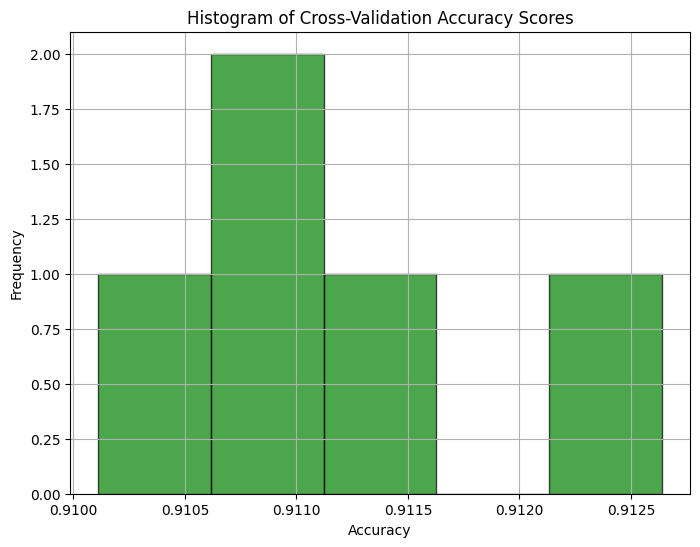

Cross-validation accuracy scores:  [0.91097222 0.91011111 0.91133333 0.91097222 0.91263889]


In [ ]:
# plot histogram of the accuracy scores in cross-validation loop
plt.figure(figsize=(8, 6))
plt.hist(cv_scores, bins=5, edgecolor='black', color = 'green', alpha=0.7)  # Customize number of bins
plt.title("Histogram of Cross-Validation Accuracy Scores")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.grid(True)

plt.show()
print("Cross-validation accuracy scores: ", cv_scores)

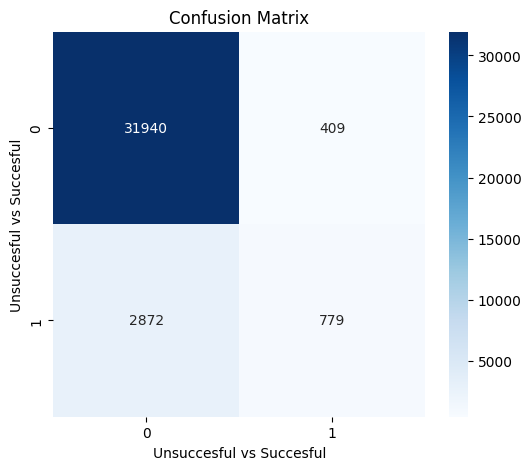

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     32349
           1       0.66      0.21      0.32      3651

    accuracy                           0.91     36000
   macro avg       0.79      0.60      0.64     36000
weighted avg       0.89      0.91      0.89     36000



In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix")
plt.xlabel("Unsuccesful vs Succesful")
plt.ylabel("Unsuccesful vs Succesful")
plt.show()

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


In [ ]:
# Separate the successful (target == 1) and unsuccessful (target == 0) transactions
successful_transactions = df[df['target'] == 1]
unsuccessful_transactions = df[df['target'] == 0]

# Determine the number of non-successful rows to keep
num_successful = len(successful_transactions)
num_unsuccessful_to_keep = num_successful  # We want a 50/50 split

# Randomly sample the non-successful transactions
unsuccessful_transactions_sampled = unsuccessful_transactions.sample(n=num_unsuccessful_to_keep, random_state=42)

# Combine the successful and non-successful transactions to form the balanced dataset
balanced_df = pd.concat([successful_transactions, unsuccessful_transactions_sampled])

# Shuffle the combined dataset to mix the rows of successful and non-successful transactions
balanced_df_x = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# balanced_df has a 50/50 split between successful and non-successful transactions
print(f"Balanced dataset shape: {balanced_df_x.shape}")

# Create the predictors DataFrame (excluding 'Unnamed: 0', 'ID_code', and 'target')
predictors_b = balanced_df_x.drop(columns=['Unnamed: 0', 'ID_code', 'target']).copy()

# Create the target DataFrame (just the 'target' column)
target_b = balanced_df_x['target'].copy()

balanced_df_x.head()

Balanced dataset shape: (36080, 53)


,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,176462,train_176462,1,13.2529,-5.3787,9.9814,6.4717,9.5026,14.0668,2.5136,...,5.3573,3.1991,2.2801,17.8967,-1.1606,18.4368,4.8765,7.7189,-0.3239,18.6897
1,101784,train_101784,0,10.9306,-3.3376,10.4269,6.5104,7.8230,13.9952,11.9494,...,5.5044,1.7825,2.3005,6.3963,2.0110,20.8003,-1.0479,4.0930,2.3524,11.2835
2,152825,train_152825,0,14.8030,-5.5184,16.7007,5.0217,6.0914,13.8630,14.3000,...,5.3838,-5.9654,0.0612,14.2972,7.4498,23.1715,-1.9564,14.6437,2.8544,15.1764
3,151988,train_151988,0,9.0741,-0.1808,10.3227,5.0510,9.0830,14.0166,9.2472,...,5.4016,0.0560,-4.7391,24.8200,2.1690,8.1017,11.4235,10.7636,4.2905,14.9446
4,12871,train_12871,1,5.8177,3.4127,10.6402,6.0575,7.4584,13.9668,15.7717,...,5.8846,9.8646,-9.0403,26.1890,4.0534,13.7838,5.4567,4.4084,0.5496,11.0231


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(predictors_b, target_b, test_size=0.2, random_state=42)

# Define the Gaussian Naïve Bayes model
gnb_b = GaussianNB()
gnb_b.fit(X_train_b, y_train_b)
y_pred_b = gnb_b.predict(X_test_b)

# Evaluate the model's performance
accuracy = accuracy_score(y_test_b, y_pred_b)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 74.72%


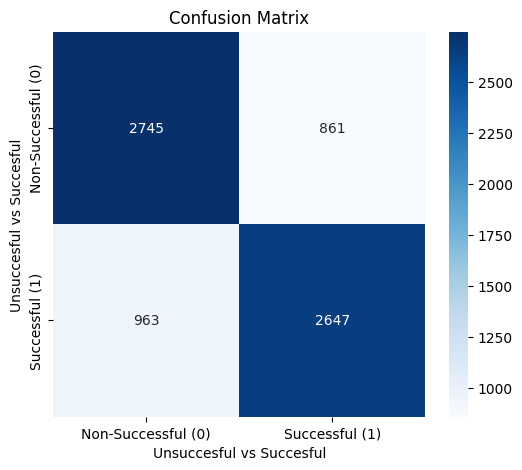

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Generate confusion matrix
confusion_matrix_b = metrics.confusion_matrix(y_test_b, y_pred_b)

# Plot confusion matrix
plt.figure(figsize=(6, 5))

# Create heatmap
sns.heatmap(confusion_matrix_b, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Successful (0)', 'Successful (1)'], yticklabels=['Non-Successful (0)', 'Successful (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Unsuccesful vs Succesful')
plt.ylabel('Unsuccesful vs Succesful')
plt.show()

In [ ]:
confusion_matrix_b = metrics.confusion_matrix(y_test_b, y_pred_b)
print(confusion_matrix_b)

[[2745  861]
 [ 963 2647]]


In [ ]:
X_balanced = balanced_df_x.drop(columns=['Unnamed: 0', 'ID_code', 'target'])  # Exclude the target column and other irrelevant columns
y_balanced = balanced_df_x['target']

gnb_b = GaussianNB()
cv_scores = cross_val_score(gnb_b, X_balanced, y_balanced, cv=5, scoring='accuracy')

# Calculate the mean accuracy from the cross-validation scores
mean_accuracy = np.mean(cv_scores)

# Report the cross-validation accuracy
print(f"Cross-Validation Accuracy on 50/50 Split: {mean_accuracy * 100:.2f}%")


Cross-Validation Accuracy on 50/50 Split: 75.88%


In [ ]:
X_imbalanced = df.drop(columns=['Unnamed: 0', 'ID_code', 'target'])
y_imbalanced = df['target']

# For balanced data (50/50 split)
X_balanced = balanced_df_x.drop(columns=['Unnamed: 0', 'ID_code', 'target'])
y_balanced = balanced_df_x['target']

# Define the Gaussian Naïve Bayes model
gnb = GaussianNB()

#  Perform cross-validation on the imbalanced training data
cv_scores_imbalanced = cross_val_score(gnb, X_imbalanced, y_imbalanced, cv=5, scoring='accuracy')

# Perform cross-validation on the 50/50 balanced training data
cv_scores_balanced = cross_val_score(gnb_b, X_balanced, y_balanced, cv=5, scoring='accuracy')

# Calculate and compare the mean accuracy for both
mean_accuracy_imbalanced = np.mean(cv_scores_imbalanced)
mean_accuracy_balanced = np.mean(cv_scores_balanced)

print(f"Cross-Validation Accuracy on Imbalanced Data: {mean_accuracy_imbalanced * 100:.2f}%")
print(f"Cross-Validation Accuracy on 50/50 Balanced Data: {mean_accuracy_balanced * 100:.2f}%")


print(f"Imbalanced Data CV Scores: {cv_scores_imbalanced}")
print(f"Balanced Data CV Scores: {cv_scores_balanced}")


Cross-Validation Accuracy on Imbalanced Data: 91.12%
Cross-Validation Accuracy on 50/50 Balanced Data: 75.88%
Imbalanced Data CV Scores: [0.91097222 0.91011111 0.91133333 0.91097222 0.91263889]
Balanced Data CV Scores: [0.75983925 0.7558204  0.75776053 0.76399667 0.7565133 ]


In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

report_b = classification_report(y_test_b, y_pred_b)
print("Classification Report on Balanced Data:")
print(report_b)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     32349
           1       0.66      0.21      0.32      3651

    accuracy                           0.91     36000
   macro avg       0.79      0.60      0.64     36000
weighted avg       0.89      0.91      0.89     36000

Classification Report on Balanced Data:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      3606
           1       0.75      0.73      0.74      3610

    accuracy                           0.75      7216
   macro avg       0.75      0.75      0.75      7216
weighted avg       0.75      0.75      0.75      7216



## Data Visualization/Communication of Results


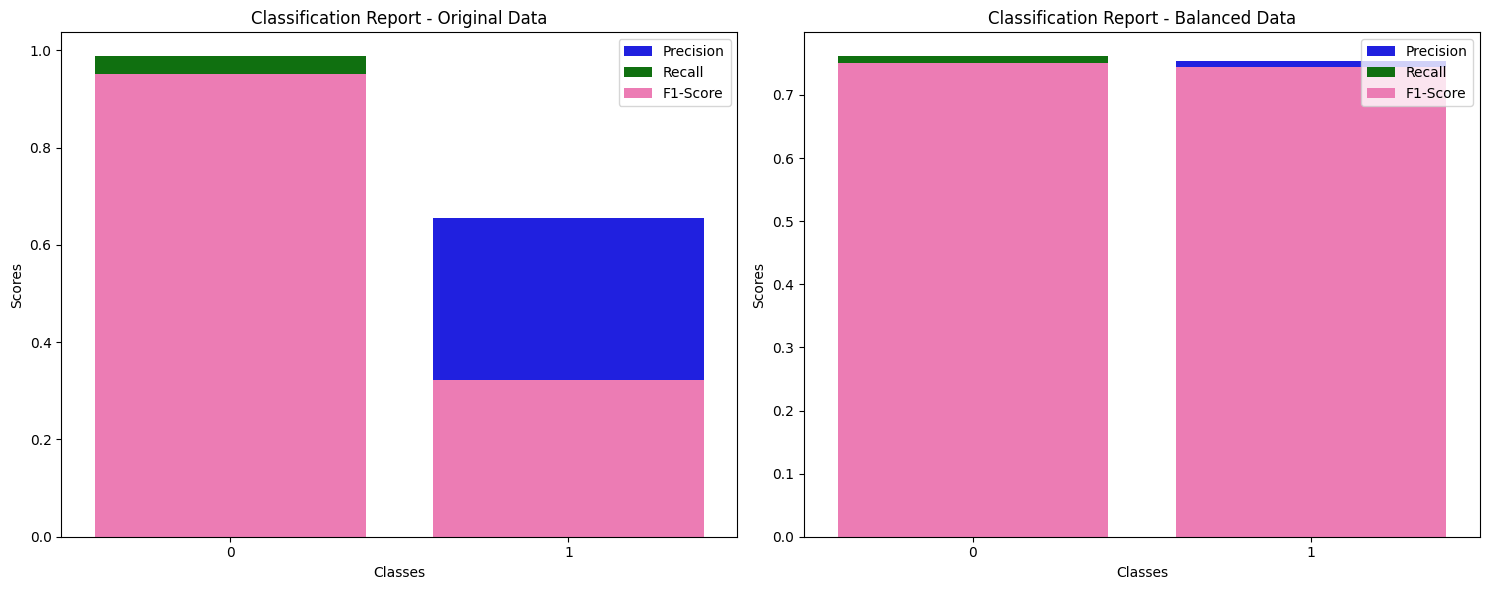

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
report_b = classification_report(y_test_b, y_pred_b, output_dict=True)

df_report = pd.DataFrame(report).transpose()
df_report_b = pd.DataFrame(report_b).transpose()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Original dataset
sns.barplot(x=df_report.index[:-3], y=df_report['precision'][:-3], ax=axes[0], color='blue', label='Precision')
sns.barplot(x=df_report.index[:-3], y=df_report['recall'][:-3], ax=axes[0], color='green', label='Recall')
sns.barplot(x=df_report.index[:-3], y=df_report['f1-score'][:-3], ax=axes[0], color='hotpink', label='F1-Score')

axes[0].set_title('Classification Report - Original Data')
axes[0].set_xlabel('Classes')
axes[0].set_ylabel('Scores')
axes[0].legend()

# Balanced dataset
sns.barplot(x=df_report_b.index[:-3], y=df_report_b['precision'][:-3], ax=axes[1], color='blue', label='Precision')
sns.barplot(x=df_report_b.index[:-3], y=df_report_b['recall'][:-3], ax=axes[1], color='green', label='Recall')
sns.barplot(x=df_report_b.index[:-3], y=df_report_b['f1-score'][:-3], ax=axes[1], color='hotpink', label='F1-Score')

axes[1].set_title('Classification Report - Balanced Data')
axes[1].set_xlabel('Classes')
axes[1].set_ylabel('Scores')
axes[1].legend()

plt.tight_layout()
plt.show()


As we can see, in the balanced dataset, there is a much better F-1 score for the succesful transactions (1). We can take a better F-1 score to mean that our model is doing a better job in balancing both precison and recall in datasets that are imbalanced. This makes sense, because we acheived a more balanced set by selecting a random sampling of unsuccesful transactions in the balanced sets as the original dataset was skewed toward the unsuccesful transactions. In terns of our business model, we'd better be able to predict if someone will purchase something based on their past transactions.

We also want to focus on the succesful transactions instead of the negative ones because that will give us more data as to how to continue to get succesful transactions.